<img src='imgs/3d.png'>

<img src='imgs/logr.jpg' width=600>

Дискриминантная функция: $$f(\overline{x}, \overline{w}, w_0) = \langle \overline{w}, \overline{x} \rangle - w_0$$

Решающее правило: 

$$a(\overline{x}, \overline{w}, w_0) = 
\left[ 
  \begin{gathered} 
      1, \langle \overline{w}, \overline{x} \rangle - w_0 > 0,
      \\ 
      0, \langle \overline{w}, \overline{x} \rangle - w_0 \leqslant 0
      \\ 
    \end{gathered} 
\right.$$


Вероятность первого класса: $$p(\overline{x}, \overline{w}, w_0) = \frac{1}{1 + e ^ {-f(\overline{x}, \overline{w}, w_0)}}$$

Вероятность того, что выборка разметится правильно равна: $$
\begin{equation*}
  \prod_{i=1}^{l} p_i^{y_i}(1 - p_i)^{1 - y_i}
\end{equation*}
$$

Почему бы не прологарифмировать?
$$
\begin{equation*}
  \sum_{i=1}^{l} \Bigl( y_i log(p_i) + (1 - y_i) log(1 - p_i) \Bigr)
\end{equation*}
$$

Значит функция потерь на каждом объекте:

$$
L = - y_i log(p_i) - (1 - y_i) log(1 - p_i)
$$

Нужно решить задачу минимизации

$$ \begin{equation*}
  \sum_{i=1}^{l} \Bigl( - y_i log(p_i) - (1 - y_i) log(1 - p_i) \Bigr)
\end{equation*} \longrightarrow  \displaystyle \min_{\overline{w}, w_0} $$

In [2]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


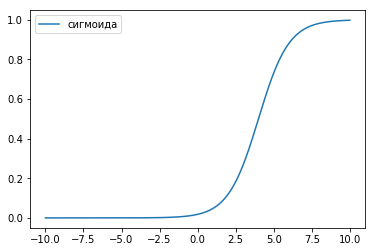

In [3]:
x = np.array([np.linspace(-10, 10, 1000), np.ones(1000)]).T
w = np.array([1,-4])
z = x.dot(w)
plot(x[:,0], 1 / (1 + np.e**-z), label=u'сигмоида')
legend();

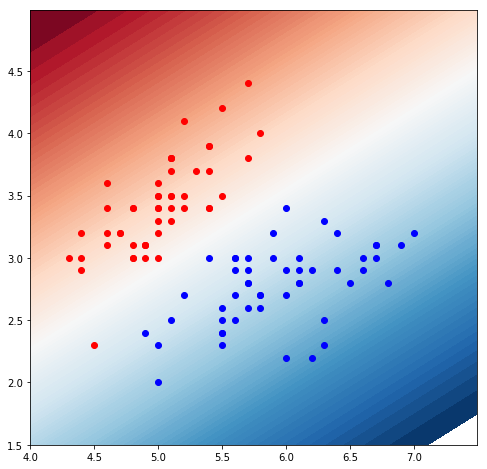

In [4]:
from sklearn.datasets import load_iris

figure(figsize=(8,8))
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2, :]
y = y[y != 2]
X = X[:, [0, 1]]

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01)
LR.fit(X, y)

X_0 = X[y==0, :]
X_1 = X[y==1, :]


xx, yy = np.meshgrid(np.arange(4., 7.5, 0.01),
                     np.arange(1.5, 5., 0.01))

Z = LR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=1, cmap=plt.cm.RdBu, levels=sorted(set(Z.flatten()))[::1000])

scatter(X_0[:,0], X_0[:,1], c='r')
_ = scatter(X_1[:,0], X_1[:,1], c='b')

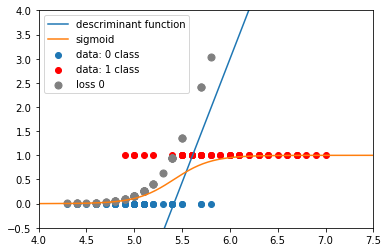

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 2, :]
y = y[y != 2]
X = X[:, [0]]

clf = LogisticRegression(C=5000)
clf.fit(X, y)

X_0 = X[y==0, :]
X_1 = X[y==1, :]


xx = np.arange(4., 7.5, 0.01)

scatter(X_0[:,0], [0] * len(X_0), label='data: 0 class')
scatter(X_1[:,0], [1] * len(X_0), c='r', label='data: 1 class')
plot(xx, clf.decision_function(np.c_[xx]), label='descriminant function')

plot(xx, clf.predict_proba(np.c_[xx])[:,1], label='sigmoid')
# plot(xx, 1 / (1 + np.e**-clf.decision_function(np.c_[xx])), 
#      label='probability: logit from decision function')

def loss(y, p):
    return -y * np.log2(p) - (1-y) * np.log2(1-p)

scatter(X_0[:,0], [loss(y, clf.predict_proba(x)[:,1]) for x, y in zip(X_0[:,0], y[y==0])], 
        c='gray', marker='o', s=50, alpha=1, label='loss 0')
# scatter(X_1[:,0], [loss(y, clf.predict_proba(x)[:,1]) for x, y in zip(X_1[:,0], y[y==1])], 
#         c='gray', marker='o', s=50, alpha=0.2, label='loss 1')

axis([4., 7.5, -0.5, 4])
plt.legend();

...Таким образом, оценки апостериорных вероятностей являются точными только при довольно сильных теоретико-вероятностных предположениях. На практике гарантировать выполнение этих условий вряд ли возможно. Поэтому трактовать выходы сигмоидных функций как вероятности следует с большой осторожностью. На самом деле они дают лишь оценку удалённости объекта от границы классов, нормированную так, чтобы она принимала значения из отрезка [0,1].
<a href='http://www.machinelearning.ru/wiki/index.php?title=Логистическая_регрессия#eq:1'>Источник</a>

## Регуляризация

l1:
$$ \displaystyle \min_{\overline{w}} \Big[ \begin{equation*}
  \sum_{i=1}^{l} \Bigl( - y_i log(p_i) - (1 - y_i) log(1 - p_i) \Bigr)
\end{equation*}  + \frac{1}{C} \sum_{j=1}^{n} |{w_j}| \Big] $$

l2:
$$ \displaystyle \min_{\overline{w}} \Big[ \begin{equation*}
  \sum_{i=1}^{l} \Bigl( - y_i log(p_i) - (1 - y_i) log(1 - p_i) \Bigr)
\end{equation*}  + \frac{1}{C} \sum_{j=1}^{n}w_j^2 \Big] $$

Больше информации: 

* <a href='https://habrahabr.ru/company/io/blog/265007/'>Как легко понять логистическую регрессию</a>
* <a href='https://florianhartl.com/logistic-regression-geometric-intuition.html'>Геометрическая интуиция</a>
* <a href='http://www.slideshare.net/yandex/voron-mllinslides'>Слайды Воронцова</a>
* <a href='http://www.machinelearning.ru/wiki/index.php?title=Логистическая_регрессия#eq:1'>Обоснование с т.з. минимизации эмпирического риска и байесовской классификации</a>

### Многоклассовая:
- Пример работы: http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html
- Лучшее обоснование, что я нашел: https://en.wikipedia.org/wiki/Multinomial_logistic_regression
- Еще можно глянуть в книжке "The Elements of Statistical Learning"

<img src="http://imgs.xkcd.com/comics/engineer_syllogism.png">